In [1]:
%load_ext autoreload
%autoreload 2
from IPython.display import YouTubeVideo

# MLP in MNIST database of handwritten digits <a class="tocSkip">
- MNIST (Modified National Institute of Standards and Technology database) 
- MPL (Multi-Layer Perceptron)

# Introducción
## Performance de distintos clasificadores 

https://en.wikipedia.org/wiki/MNIST_database

![Classifiers-CNN.png](Classifiers-CNN.png)

## El MNIST dataset

- Surge de mezclar el NIST original (Test set y Train set eran de fuentes diferentes)
- Mas de 20 años de publicaciones al respecto
- Muy investigado y mucha documentación
- 60.000 imagenes en training y 10.000 en testing
- Todas las imagenes del mismo tamaño 28x28
- Ya preprocesadas
- En su publicación original en 2002 se utilizó SVM (Support Vector Machine) con una exactitud de 0.8

## Video recomendado:
[Tensorflow and deep learning, without a PhD](https://www.youtube.com/watch?v=vq2nnJ4g6N0)

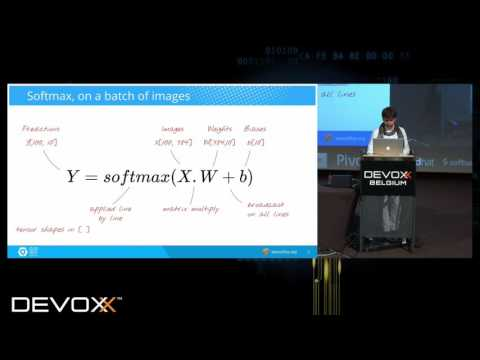

In [2]:
YouTubeVideo('vq2nnJ4g6N0')

# Importar y analizar dataset

In [7]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from fnn_helper import PlotLosses
from MNIST_helper import plot_numbers, visualize_input
import draw_nn

## [Keras](https://keras.io/)
- API de alto nivel (high-level neural networks API)
- Escrita en Python 
- **Backend**: Corre TensorFlow, CNTK, or Theano

## Importo el dataset

In [8]:
from keras.datasets import mnist
(x, y), (x_test, y_test) = mnist.load_data()

# 20% del dataset para validación
validation = 0.20
N_validation_split = int(x.shape[0]*(1-validation))
# Training Set
x_train = x[:N_validation_split]
y_train = y[:N_validation_split]

# Cross Validation Set
x_val = x[N_validation_split:]
y_val = y[N_validation_split:]

In [9]:
print('Training set data:', x_train.shape)
print('Training labels:', y_train.shape)
print()
print('CV set data:', x_val.shape)
print('CV labels:', y_val.shape)
print()
print('Testing set data:',x_test.shape)
print('Testing labels:', y_test.shape)

Training set data: (48000, 28, 28)
Training labels: (48000,)

CV set data: (12000, 28, 28)
CV labels: (12000,)

Testing set data: (10000, 28, 28)
Testing labels: (10000,)


## Grafico los 100 primeros dígitos

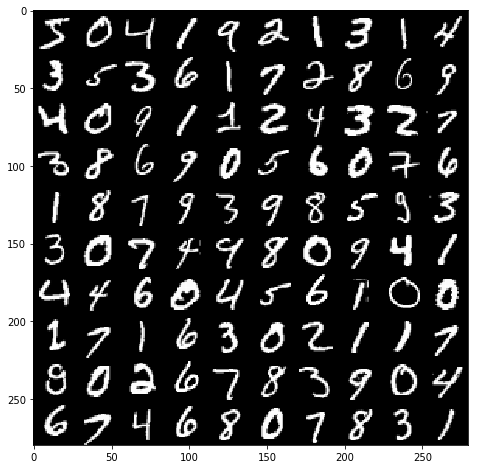

In [10]:
plot_numbers(x_train,range(100), columns=10, figsize=(8, 8))

## Vizualizo un dígito en escala de grises

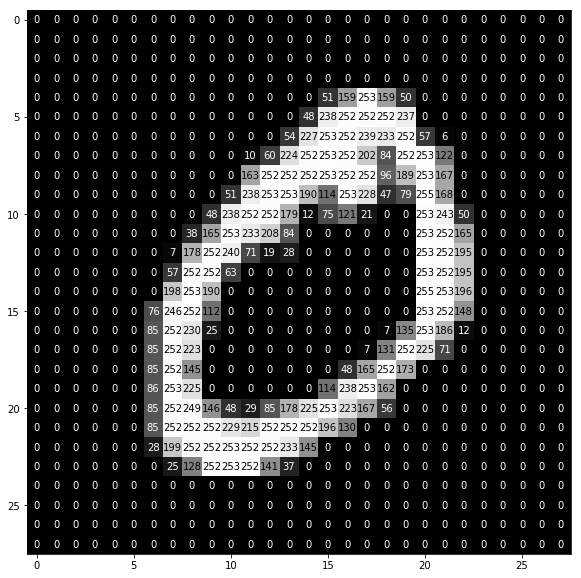

In [11]:
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(x_train[1], ax)
plt.show()

# Regresión logística multinomial

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_mldata

## Acomodo entrada

In [13]:
x_train_flattened = x_train.reshape(-1,784)
x_test_flattened = x_test.reshape(-1,784)

## Entreno clasificador

In [14]:
clf_logistic = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=10, tol=0.05)
clf_logistic.fit(x_train_flattened, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='saga',
          tol=0.05, verbose=0, warm_start=False)

## Imprimo resultados

In [15]:
train_score_logistic = clf_logistic.score(x_train_flattened, y_train)
test_score_logistic = clf_logistic.score(x_test_flattened, y_test)
print(train_score_logistic, test_score_logistic)

0.929479166667 0.9248


# Red Neuronal de 1 Capa

## Diagrama

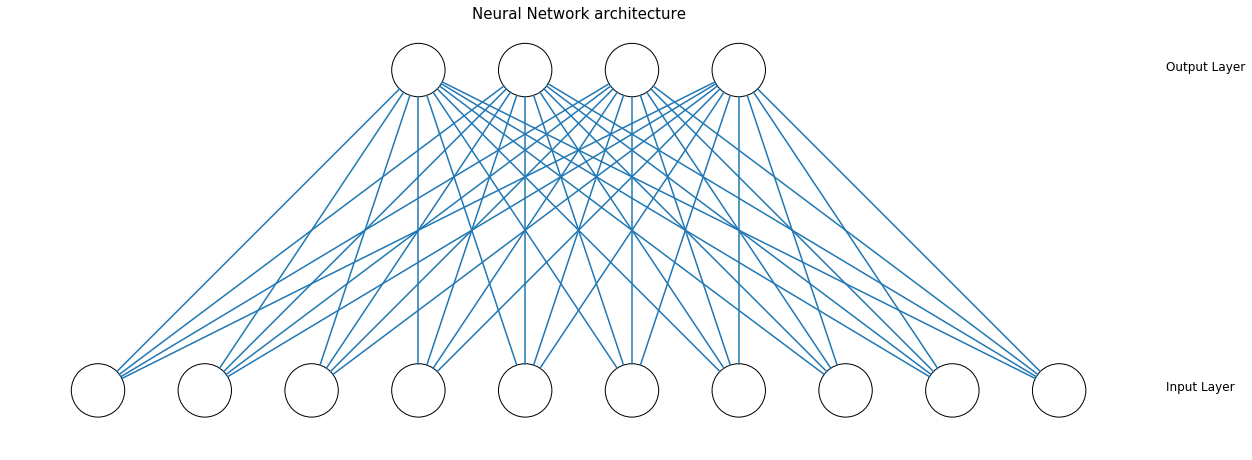

Realmente tengo 784 neuronas en la entrada y 10 en la salida


In [16]:
network = draw_nn.DrawNN( [10,4] )
network.draw()
print("Realmente tengo 784 neuronas en la entrada y 10 en la salida")

In [20]:
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.utils import np_utils

In [21]:
x_train.shape[1:]

(28, 28)

## Acomodo Salida: one-hot encoding

In [22]:
y_train_categorical = keras.utils.to_categorical(y_train)
y_val_categorical = keras.utils.to_categorical(y_val)
y_test_categorical = keras.utils.to_categorical(y_test)
print(y_train_categorical.shape)
print(y_train_categorical[0])

(48000, 10)
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


## Definimos el modelo

In [23]:
output_size = 10

# Creo el modelo
model_single_layer = Sequential()
model_single_layer.add(Flatten(input_shape=x_train.shape[1:]))
model_single_layer.add(Dense(output_size, kernel_initializer='zeros', name='Salida'))
model_single_layer.add(Activation('softmax'))
model_single_layer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
Salida (Dense)               (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Compilamos el modelo
lr suele ser proporcional al mini-bath size. Es decir que si funciona con un lr y aumento el bs, deberia aumentar proporcionalmente el lr

In [24]:
# Compilo el modelo
lr = 0.00001 #0.01, 0.001, 0.00001, 0.000001, 0.00000001
#lr = 0.00000001
#lr = 0.01
SGD = optimizers.SGD(lr=lr)
model_single_layer.compile(loss = 'categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])

## Preguntas y explicación de parametros

- ¿Por que tiene esa cantidad de parametros?

Capas ([Core Layers](https://keras.io/layers/core/)):
- Dense
- Flatten
- Activation

Parámetros:
- Learning Rate (lr)
- Funciones de activación ([Activations](https://keras.io/activations/)): Sigmoid, Relu, [softmax](https://en.wikipedia.org/wiki/Softmax_function)
- Optimizers: [Keras](https://keras.io/optimizers/), [Articulo interesante](http://ruder.io/optimizing-gradient-descent/)
- Costo ([losses](https://keras.io/losses/))
- [Initializers](https://keras.io/initializers/)

## Exactitud del modelo sin entrenar
**¿Cuanto es de esperar?**

In [25]:
score = model_single_layer.evaluate(x_test, y_test_categorical, verbose=0)
print("loss: ", score[0])
print("accuracy: ", score[1])

loss:  2.30258536301
accuracy:  0.098


## Defino Callbacks
(No son estrictamente necesarias)

In [26]:
# Callbacks
## Callback para graficar
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=20, x_val=x_val, y_val_categorical=y_val_categorical)
## Callback para guardar pesos
checkpointer = ModelCheckpoint(filepath='single-layer.mnist.hdf5', verbose=1, save_best_only=True)

## Entreno el modelo

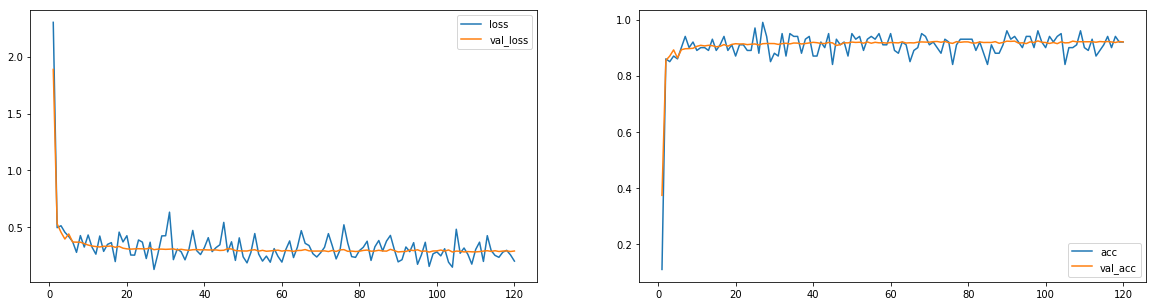

Epoch 00004: val_loss did not improve
48000/48000 [==============================] - 9s - loss: 0.2927 - acc: 0.9177 - val_loss: 0.2941 - val_acc: 0.9202


In [27]:
batch_size = 1000
batch_size = 100
model_single_layer.fit(x_train, 
                       y_train_categorical,
                       epochs=5, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_val, y_val_categorical),
                       callbacks=[plot_losses, checkpointer],
                      )

**¿Por que val_loss y val_acc es menos ruidosa que loss y val?**

## Exactitud del modelo despues de entrenar

In [28]:
score = model_single_layer.evaluate(x_test, y_test_categorical, verbose=0)
print("loss: ", score[0])
print("accuracy: ", score[1])

loss:  0.293521309307
accuracy:  0.9179


## Analisis de los pesos

In [29]:
weights = model_single_layer.get_weights()[0]
biases = model_single_layer.get_weights()[1]
print(weights.shape)
print(biases)

(784, 10)
[ -1.74396700e-05   1.47290921e-05   1.11900526e-05  -1.45605818e-05
   2.21161145e-06   8.91268210e-05  -5.98939732e-06   3.24312750e-05
  -9.51599504e-05  -1.65391448e-05]


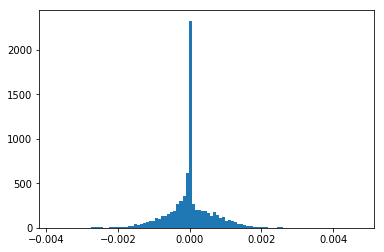

In [30]:
plt.hist(weights.flatten(), 100)
plt.show()

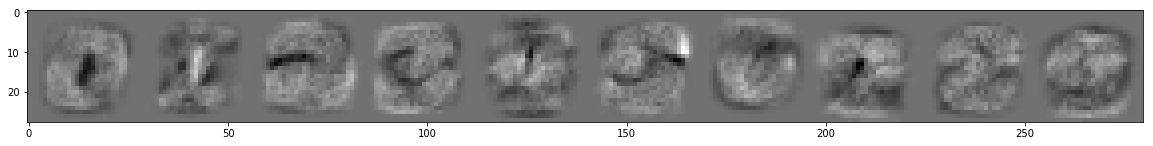

In [31]:
plt.figure(figsize=(20,20))
concatenated_weights = weights[:,0].reshape(28,28)
for wei in weights.T[1:10]:
    concatenated_weights = np.concatenate((concatenated_weights, wei.reshape(28,28)),axis=1 )
plt.imshow(concatenated_weights, cmap='gray')
plt.show()

## Analisis de dígitos errados

In [32]:
def get_errors(model, x_test, y_test):
    predicted = model.predict(x_test)
    predicted_numbers = predicted.argmax(axis=1)
    accuracy = (predicted_numbers==y_test).sum()/predicted_numbers.shape[0]
    error_indexes = np.where((predicted_numbers==y_test)==False)[0]
    error = error_indexes.shape[0]/predicted_numbers.shape[0]
    return accuracy, error, error_indexes, predicted_numbers
accuracy, error, error_indexes, predicted_numbers = get_errors(model_single_layer, x_test, y_test)
print(accuracy, error, accuracy + error)
print(predicted_numbers.shape)

0.9179 0.0821 1.0
(10000,)


[5 4 3 6 9 7 2 3 5 6 8 9 3 4 6 8 4 0 7 3 9 2 5 8 5 2 0 3 8 8 6 9 3 3 7 5 9
 8 5 3 4 3 2 8 7 4 3 4 8 3 2 8 3 1 3 2 2 7 8 4 0 5 4 4 5 8 8 5 8 4 3 0 7 2
 3 2 8 7 1 4 6 3 9 7 6 6 3 5 8 7 6 3 8 5 8 8 9 4 3 7]
[6 6 2 7 7 4 9 8 7 5 7 8 5 2 0 5 6 5 9 5 7 7 3 5 0 7 5 7 5 7 0 8 5 5 9 8 8
 2 3 5 8 6 1 3 1 9 5 9 5 2 8 3 5 8 9 6 9 2 4 9 6 2 9 9 9 3 7 3 2 9 5 5 2 7
 5 5 9 2 6 9 0 2 7 9 5 2 5 8 3 9 8 9 4 3 2 2 3 6 8 2]


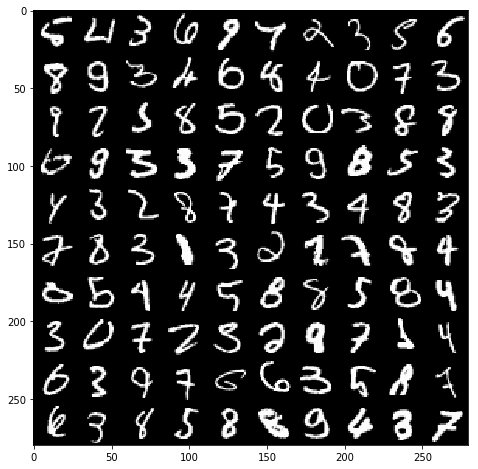

In [33]:
print(y_test[error_indexes[:100]])
print(predicted_numbers[error_indexes[:100]])
plot_numbers(x_test,error_indexes[:100], columns=10, figsize=(8, 8))

## Cargo pesos guardados
Los pesos fueron guardados con la clase ModelCheckpoint. Vamos a recuperarlos

In [34]:
# Cargo los valores del modelo
model_single_layer.load_weights('single-layer.mnist.hdf5')
score = model_single_layer.evaluate(x_test, y_test_categorical, verbose=0)
print("loss: ", score[0])
print("accuracy: ", score[1])

loss:  0.295387743905
accuracy:  0.9177


## Recordatorio
- Variar lr
- Variar mini-batch size

# [Como hacer lo mismo en Tensorflow](./2-Tensorflow-MNIST.ipynb)

# Red Neuronal de 2 capas

## Diagrama

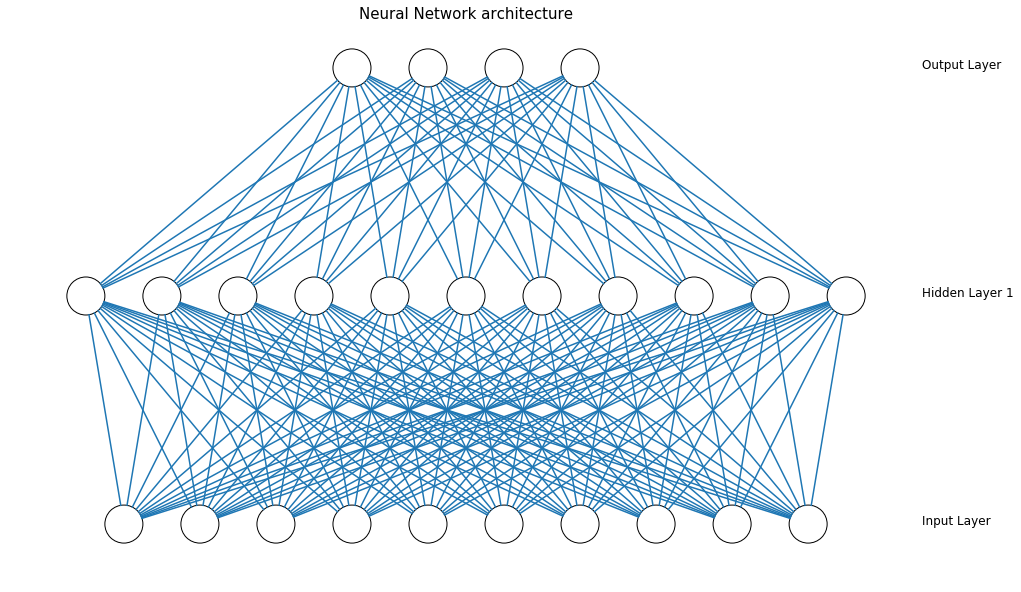

Realmente tengo 784 neuronas en la entrada, 800 en el hidden y 10 en la salida


In [35]:
network = draw_nn.DrawNN( [10,11,4] )
network.draw()
print("Realmente tengo 784 neuronas en la entrada, 800 en el hidden y 10 en la salida")

## Definición y compilación del modelo

In [36]:
def two_layer_model(lr=0.000001, decay=0):
    output_size = 10
    model = Sequential()
    model.add(Flatten(input_shape=x_train.shape[1:]))
    model.add(Dense(800, activation='sigmoid', kernel_initializer='zeros', name='middle'))
    model.add(Dense(output_size, activation='softmax', kernel_initializer='normal', name='Salida'))
    
    SGD = optimizers.SGD(lr=lr)
    model.compile(loss = 'categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])
    return model
model_two_layers = two_layer_model()
model_two_layers.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
middle (Dense)               (None, 800)               628000    
_________________________________________________________________
Salida (Dense)               (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


## Calculo de la cantidad de parámetros
**¿de donde sale la cantidad de parámetros?**

In [37]:
first_layer = 784*800+800
print(first_layer)
last_layer = 800*10 + 10
print(last_layer)
print(first_layer+last_layer)

628000
8010
636010


## Evaluación antes de entrenar

In [38]:
score_two_layers = model_two_layers.evaluate(x_test, y_test_categorical, verbose=0)
print("loss: ", score_two_layers[0])
print("accuracy: ", score_two_layers[1])

loss:  2.38908800735
accuracy:  0.1032


## Entrenamientos

### Learning rate = 0.01

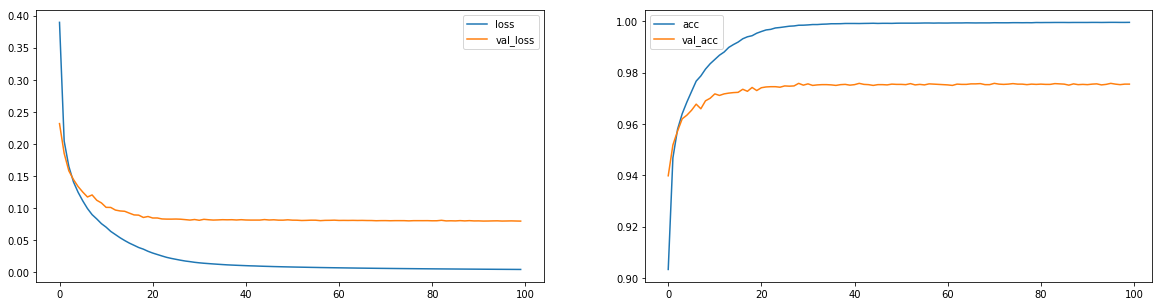

48000/48000 [==============================] - 7s - loss: 0.0044 - acc: 0.9996 - val_loss: 0.0797 - val_acc: 0.9755


In [39]:
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_val, y_val_categorical=y_val_categorical)
model_two_layers = two_layer_model(lr=0.01) # lr=0.000001, 
model_two_layers.fit(x_train, 
          y_train_categorical ,
          epochs=100, batch_size=100, 
          #verbose=1, 
          validation_data=(x_test, y_test_categorical), 
          callbacks=[plot_losses],
         )

### Learning rate = 0.1

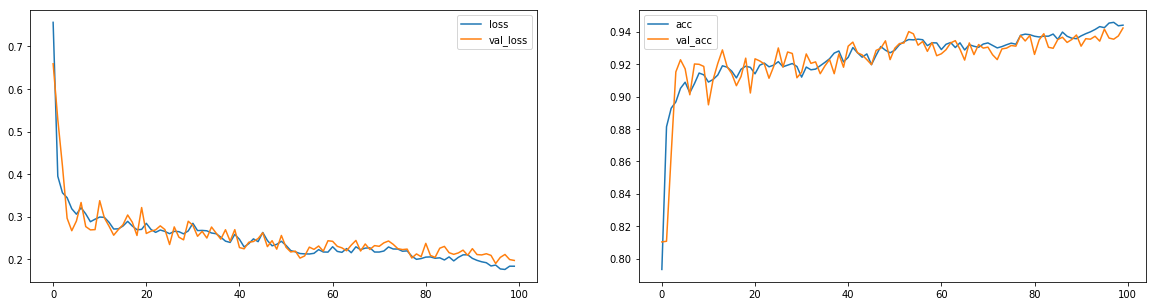

48000/48000 [==============================] - 7s - loss: 0.1834 - acc: 0.9441 - val_loss: 0.1970 - val_acc: 0.9423


In [127]:
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_val, y_val_categorical=y_val_categorical)
model_two_layers_2 = two_layer_model(lr=0.1) # lr=0.000001, 
model_two_layers_2.fit(x_train, 
          y_train_categorical ,
          epochs=100, batch_size=100, 
          #verbose=1, 
          validation_data=(x_test, y_test_categorical), 
          callbacks=[plot_losses],
         )

### Learning rate = 0.1 + decay

lr = self.lr * (1. / (1. + self.decay * self.iterations))

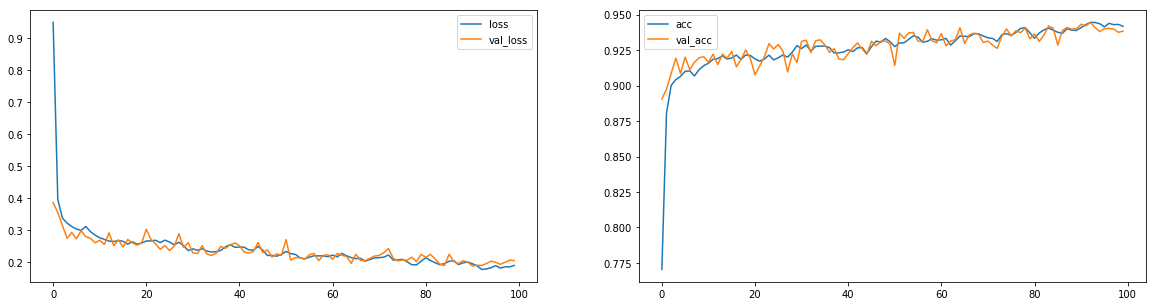

48000/48000 [==============================] - 6s - loss: 0.1897 - acc: 0.9419 - val_loss: 0.2049 - val_acc: 0.9384


In [132]:
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_val, y_val_categorical=y_val_categorical)
model_two_layers_3 = two_layer_model(lr=0.1, decay=1e-3) # lr=0.000001, 
model_two_layers_3.fit(x_train, 
          y_train_categorical ,
          epochs=100, batch_size=100, 
          #verbose=1, 
          validation_data=(x_test, y_test_categorical), 
          callbacks=[plot_losses],
         )

### Optimizer Rmsprop

In [139]:
def two_layer_model_rms():
    output_size = 10
    model = Sequential()
    model.add(Flatten(input_shape=x_train.shape[1:]))
    model.add(Dense(800, activation='sigmoid', kernel_initializer='normal', name='middle'))
    model.add(Dense(output_size, activation='softmax', kernel_initializer='normal', name='Salida'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

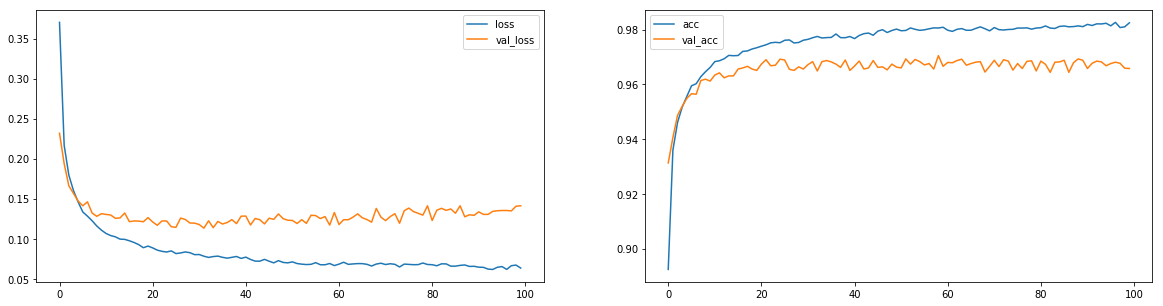

48000/48000 [==============================] - 10s - loss: 0.0635 - acc: 0.9825 - val_loss: 0.1413 - val_acc: 0.9658


In [140]:
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_val, y_val_categorical=y_val_categorical)
model_two_layers_rms = two_layer_model_rms() 
model_two_layers_rms.fit(x_train, 
          y_train_categorical ,
          epochs=100, batch_size=100, 
          #verbose=1, 
          validation_data=(x_test, y_test_categorical), 
          callbacks=[plot_losses],
         )

###  Optimizer Rmsprop + Activation Relus

In [141]:
def two_layer_model_rms_relu():
    output_size = 10
    model = Sequential()
    model.add(Flatten(input_shape=x_train.shape[1:]))
    model.add(Dense(800, activation='relu', kernel_initializer='normal', name='middle'))
    model.add(Dense(output_size, activation='softmax', kernel_initializer='normal', name='Salida'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

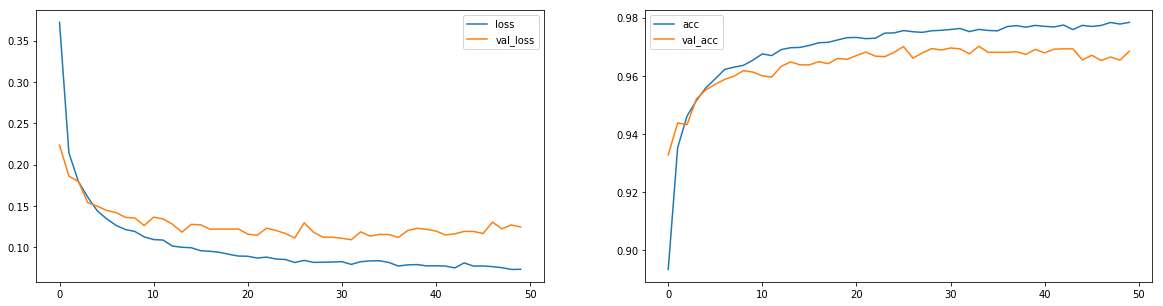

48000/48000 [==============================] - 10s - loss: 0.0732 - acc: 0.9784 - val_loss: 0.1244 - val_acc: 0.9685


In [142]:
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_val, y_val_categorical=y_val_categorical)
model_two_layers_rms_relu = two_layer_model_rms() # lr=0.000001, 
model_two_layers_rms_relu.fit(x_train, 
          y_train_categorical ,
          epochs=50, batch_size=100, 
          #verbose=1, 
          validation_data=(x_test, y_test_categorical), 
          callbacks=[plot_losses],
         )

# Red Neuronal de 5 capas

## Activation: Relus
### Definición y compilación del modelo

In [164]:
output_size = 10
initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=None)
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(200, activation='relu', kernel_initializer='normal', name='middle1'))
model.add(Dense(100, activation='relu', kernel_initializer='normal', name='middle2'))
model.add(Dense(60, activation='relu', kernel_initializer='normal', name='middle3'))
model.add(Dense(30, activation='relu', kernel_initializer='normal', name='middle4'))
model.add(Dense(output_size, activation='softmax', kernel_initializer='normal', name='salida'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_68 (Flatten)         (None, 784)               0         
_________________________________________________________________
middle1 (Dense)              (None, 200)               157000    
_________________________________________________________________
middle2 (Dense)              (None, 100)               20100     
_________________________________________________________________
middle3 (Dense)              (None, 60)                6060      
_________________________________________________________________
middle4 (Dense)              (None, 30)                1830      
_________________________________________________________________
salida (Dense)               (None, 10)                310       
Total params: 185,300
Trainable params: 185,300
Non-trainable params: 0
_________________________________________________________________


In [165]:
adam = optimizers.Adam(lr=0.001, decay=0.0) #decay=1e-4
model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

### Entrenamiento del modelo

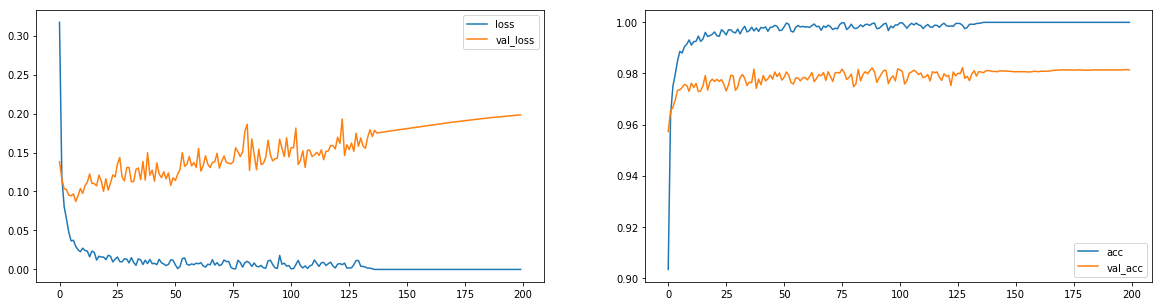

48000/48000 [==============================] - 3s - loss: 1.1977e-07 - acc: 1.0000 - val_loss: 0.1983 - val_acc: 0.9814


In [166]:
model.fit(x_train, 
          y_train_categorical ,
          epochs=200, batch_size=200, 
          #verbose=1, 
          validation_data=(x_test, y_test_categorical), 
          callbacks=[plot_losses],
         )

### Resultados

In [264]:
accuracy, error, error_indexes, predicted_numbers = get_errors(model, x_test, y_test)
print(accuracy, error, accuracy + error)
print(predicted_numbers.shape)
(y_test[error_indexes[:20]]==predicted_numbers[error_indexes[:20]]).sum()

0.9814 0.0186 1.0
(10000,)


0

[4 2 9 4 2 5 6 3 8 7]
[8 1 7 5 7 9 2 3 5 8]

[9 9 8 2 7 3 0 5 0 9]
[2 8 3 8 9 4 7 8 4 9]


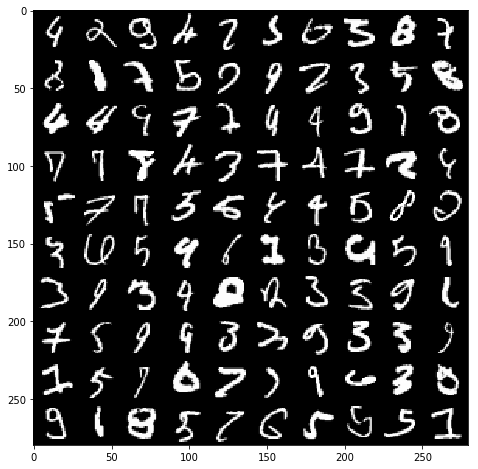

In [261]:
print(y_test[error_indexes[:10]])
print(y_test[error_indexes[10:20]])
print()
print(predicted_numbers[error_indexes[:10]])
print(predicted_numbers[error_indexes[10:20]])
plot_numbers(x_test,error_indexes[:100], columns=10, figsize=(8, 8))

## Activation: Sigmoid
### Definición y compilación del modelo

In [174]:
output_size = 10
initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=None)
model_five_sigmoid = Sequential()
model_five_sigmoid.add(Flatten(input_shape=x_train.shape[1:]))
model_five_sigmoid.add(Dense(200, activation='sigmoid', kernel_initializer='normal', name='middle1'))
model_five_sigmoid.add(Dense(100, activation='sigmoid', kernel_initializer='normal', name='middle2'))
model_five_sigmoid.add(Dense(60, activation='sigmoid', kernel_initializer='normal', name='middle3'))
model_five_sigmoid.add(Dense(30, activation='sigmoid', kernel_initializer='normal', name='middle4'))
model_five_sigmoid.add(Dense(output_size, activation='softmax', kernel_initializer='normal', name='salida'))
model_five_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_71 (Flatten)         (None, 784)               0         
_________________________________________________________________
middle1 (Dense)              (None, 200)               157000    
_________________________________________________________________
middle2 (Dense)              (None, 100)               20100     
_________________________________________________________________
middle3 (Dense)              (None, 60)                6060      
_________________________________________________________________
middle4 (Dense)              (None, 30)                1830      
_________________________________________________________________
salida (Dense)               (None, 10)                310       
Total params: 185,300
Trainable params: 185,300
Non-trainable params: 0
_________________________________________________________________


In [175]:
model_five_sigmoid.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Entrenamiento del modelo

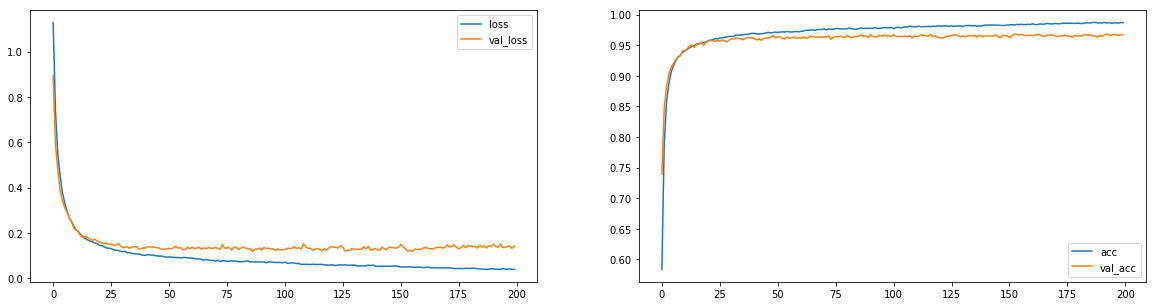

48000/48000 [==============================] - 3s - loss: 0.0401 - acc: 0.9870 - val_loss: 0.1418 - val_acc: 0.9671


In [177]:
model_five_sigmoid.fit(x_train, 
          y_train_categorical ,
          epochs=200, batch_size=100, 
          #verbose=1, 
          validation_data=(x_val, y_val_categorical), 
          callbacks=[plot_losses],
         )

### Resultados

In [266]:
accuracy, error, error_indexes, predicted_numbers = get_errors(model_five_sigmoid, x_test, y_test)
print(accuracy, error, accuracy + error)
print(predicted_numbers.shape)
(y_test[error_indexes[:20]]==predicted_numbers[error_indexes[:20]]).sum()

0.9634 0.0366 1.0
(10000,)


0

[5 4 9 8 8 2 5 3 5 6]
[4 9 9 2 8 2 8 2 5 5]

[8 9 8 5 1 7 3 7 3 0]
[9 3 3 3 2 3 2 1 3 3]


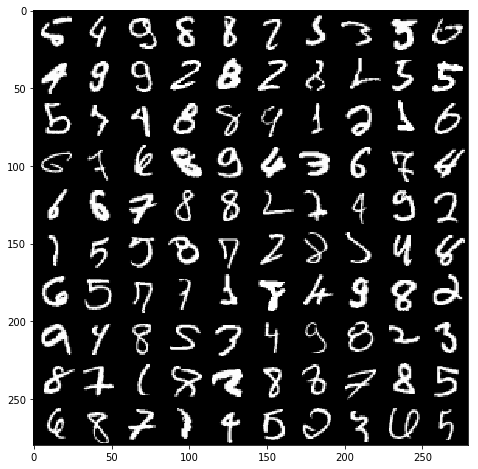

In [267]:
print(y_test[error_indexes[:10]])
print(y_test[error_indexes[10:20]])
print()
print(predicted_numbers[error_indexes[:10]])
print(predicted_numbers[error_indexes[10:20]])
plot_numbers(x_test,error_indexes[:100], columns=10, figsize=(8, 8))

# Limitaciones de MLP para clasificación de imágenes:
- Cantidad muy grande de parametros
- Se pierden las relaciones originales de los pixeles adyacentes (flatten). 